Описание данных

**Name of the anime** - наименование аниме-продукта

**Rating** - фанатская средняя оценка аниме (10-ти бальная шкала)

**Ranking** - номер аниме в рейтинге (топ-2000)

**Followers** - число проголосовавших за аниме фанатов

**Type** - тип аниме 

**Episodes** - количество серий

**License** - компания лицензиат

**Study** - студия издатель

**Genre** - жанр аниме

**Demographics** - жанр аниме по демографической направленности 

**Age** - возростное ограничение аниме

Цель: изучить аниме продукты, чтобы выявить ключевые элементы успешности аниме и заметить особености 

In [4]:
import pandas as pd
import warnings
import numpy as np
import scipy.stats

warnings.filterwarnings('ignore')
anime = pd.read_csv('Anime.csv')
anime.head()

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age
0,Death Note,8.63,1,"3,150,451",TV,37,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity)
1,Shingeki no Kyojin,8.52,2,"3,136,959",TV,25,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity)
2,Fullmetal Alchemist: Brotherhood,9.16,3,"2,674,846",TV,64,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity)
3,Sword Art Online,7.21,4,"2,583,874",TV,25,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older
4,One Punch Man,8.52,5,"2,577,610",TV,12,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity)


**Начнем с фильтрации и сортировки данных, изучим переменные и то, какого они типа:**

In [5]:
anime.columns

Index(['Name of the anime', 'Rating', 'Ranking', 'Followers', 'Type',
       'Episodes', 'License', 'Study', 'Genre', 'Demographics', 'Age'],
      dtype='object')

In [6]:
anime.shape

(2000, 11)

In [7]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name of the anime  2000 non-null   object 
 1   Rating             1979 non-null   float64
 2   Ranking            2000 non-null   int64  
 3   Followers          2000 non-null   object 
 4   Type               2000 non-null   object 
 5   Episodes           2000 non-null   object 
 6   License            2000 non-null   object 
 7   Study              2000 non-null   object 
 8   Genre              1832 non-null   object 
 9   Demographics       884 non-null    object 
 10  Age                2000 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 172.0+ KB


In [8]:
anime['Episodes'].unique()

array(['37', '25', '64', '12', '13', '220', '1', '148', '24', '26', '500',
       '22', 'Unknown', '10', '366', '175', '51', '27', '11', '16', '23',
       '15', '170', '291', '20', '201', '153', '102', '39', '14', '120',
       '3', '74', '6', '43', '167', '131', '103', '4', '112', '276', '60',
       '203', '47', '62', '75', '50', '94', '2', '70', '5', '54', '224',
       '73', '7', '8', '46', '97', '110', '52', '101', '161', '21', '77',
       '38', '18', '180', '127', '99', '145', '114', '192', '178', '19',
       '61', '49', '93', '45', '191', '154', '109', '147', '150', '9',
       '48', '78', '36', '34', '100', '69', '146', '84', '76', '40',
       '128'], dtype=object)

In [9]:
anime['Type'].unique()

array(['TV', 'Movie', 'ONA', 'OVA', 'Special', 'Music', 'Unknown'],
      dtype=object)

In [10]:
anime[anime['Type'] == 'TV'].shape

(1462, 11)

**Длинными тайтлами в данном жанрке считаются многосерийные аниме от 50 эпизодов. И относящиеся к типу TV (сериал). Посмотрим сколько длинных тайтлов в нашей подборке. Переведем сначала значения в цифровые показатели** 

In [11]:
anime['Episodes'] = pd.to_numeric(anime['Episodes'], errors='coerce')

In [12]:
anime['Followers'] = anime['Followers'].str.replace(',','').astype(int)

In [13]:
anime['Ranking'] = anime['Ranking'].astype(int)

In [14]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name of the anime  2000 non-null   object 
 1   Rating             1979 non-null   float64
 2   Ranking            2000 non-null   int32  
 3   Followers          2000 non-null   int32  
 4   Type               2000 non-null   object 
 5   Episodes           1975 non-null   float64
 6   License            2000 non-null   object 
 7   Study              2000 non-null   object 
 8   Genre              1832 non-null   object 
 9   Demographics       884 non-null    object 
 10  Age                2000 non-null   object 
dtypes: float64(2), int32(2), object(7)
memory usage: 156.4+ KB


In [15]:
anime[(anime['Type'] == 'TV') & (anime['Episodes'] > 50)].shape

(77, 11)

**Среди топ в 2000 аниме длинных многосерийников представлено 77, интересно узнать и то, какое аниме самый продолжительное - найдем гиганта**

In [16]:
anime['Episodes'].sort_values(ascending=False)

15      500.0
37      366.0
94      291.0
295     276.0
503     224.0
        ...  
1744      NaN
1776      NaN
1880      NaN
1893      NaN
1925      NaN
Name: Episodes, Length: 2000, dtype: float64

In [17]:
anime.iloc[15]

Name of the anime           Naruto: Shippuuden
Rating                                    8.22
Ranking                                     16
Followers                              1925747
Type                                        TV
Episodes                                 500.0
License                              VIZ Media
Study                           Studio Pierrot
Genre                  Action,Adventure,Comedy
Demographics                           Shounen
Age                  PG-13 - Teens 13 or older
Name: 15, dtype: object

Наруто Шиппуден с 500 серий - самое длинное многосерийное аниме 

**Нам интересно изучить топ 2000 аниме одного из популярных сайтов, для того чтобы понять критерии для того, как создать популярное и интересное аниме. Для этого проанализируем жанры, студии, возраст, тип аниме-продукта. Простым способом вычислим аниме какой демографической направленности наиболее часто встречаются в топ-2000** 

In [18]:
anime['Demographics'].unique()

array(['Shounen', nan, 'Seinen', 'Shoujo', 'Kids', 'Josei'], dtype=object)

In [19]:
anime[anime['Demographics'] == 'Shounen'].shape

(510, 11)

In [20]:
anime[anime['Demographics'] == 'Seinen'].shape

(218, 11)

In [21]:
anime[anime['Demographics'] == 'Shoujo'].shape

(104, 11)

In [22]:
anime[anime['Demographics'] == 'Kids'].shape

(25, 11)

In [23]:
anime[anime['Demographics'] == 'Josei'].shape

(27, 11)

**Часто аниме расчитано на разную целевую аудиторию, поэтому мы имеем достаточно много пустых значений, но если говорить о популярности ани ме у определеного демографического круга - лидирует Shounen (это в целом четверть от всего топ списка аниме).  Сёнэн — аниме, манга и ранобэ, рассчитанные на особую целевую аудиторию — мальчиков и юношей в возрасте от 12 до 18 лет.** 

Создадим для удобства новую переменную - для аналитики по возрасту и демографии

In [24]:

anime.head()

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age
0,Death Note,8.63,1,3150451,TV,37.0,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity)
1,Shingeki no Kyojin,8.52,2,3136959,TV,25.0,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity)
2,Fullmetal Alchemist: Brotherhood,9.16,3,2674846,TV,64.0,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity)
3,Sword Art Online,7.21,4,2583874,TV,25.0,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older
4,One Punch Man,8.52,5,2577610,TV,12.0,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity)


In [25]:
anime['Age'].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'R+ - Mild Nudity', 'PG - Children', 'G - All Ages', 'None',
       'Rx - Hentai'], dtype=object)

In [26]:
def age_cat(x):
    if x == 'R - 17+ (violence & profanity)':
        return 1
    elif x == 'R+ - Mild Nudity':
        return 1
    elif x == 'Rx - Hentai':
        return 1
    else:
        return 0
        
    
anime['Adult'] = anime['Age'].apply(age_cat)


In [27]:
anime.head()

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age,Adult
0,Death Note,8.63,1,3150451,TV,37.0,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity),1
1,Shingeki no Kyojin,8.52,2,3136959,TV,25.0,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity),1
2,Fullmetal Alchemist: Brotherhood,9.16,3,2674846,TV,64.0,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity),1
3,Sword Art Online,7.21,4,2583874,TV,25.0,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older,0
4,One Punch Man,8.52,5,2577610,TV,12.0,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity),1


**Теперь у нас есть отдельная переменная в которую мы отправили все аниме с рейтингом R - оно предназначается к просмотру исключительно для взрослой аудитории**

In [28]:
def age_cat(y):
    if y == 'Shounen':
        return 1
    elif y == 'Seinen':
        return 1
    else:
        return 0
        
    
anime['For man'] = anime['Demographics'].apply(age_cat)


In [29]:
def age_cat(y):
    if y == 'Shoujo':
        return 1
    elif y == 'Josei':
        return 1
    else:
        return 0
        
    
anime['For woman'] = anime['Demographics'].apply(age_cat)


In [30]:
anime.head()

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age,Adult,For man,For woman
0,Death Note,8.63,1,3150451,TV,37.0,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity),1,1,0
1,Shingeki no Kyojin,8.52,2,3136959,TV,25.0,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity),1,1,0
2,Fullmetal Alchemist: Brotherhood,9.16,3,2674846,TV,64.0,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity),1,1,0
3,Sword Art Online,7.21,4,2583874,TV,25.0,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older,0,0,0
4,One Punch Man,8.52,5,2577610,TV,12.0,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity),1,0,0


Так же для ряда аниме-продуктов мы ввели конкретные переменные для парней и для женщин, соединив демографические направления в которых пересекается ЦА по полу

**Найдем какая Студия создающая аниме наиболее часто встречается в рейтинге из 2000 мультфильмов, чтобы понять какая из студий наиболее успешна и умеет создавать Хиты. Так же изучим и лицензионные компании**

In [31]:
anime['Study'].value_counts()

J.C.Staff                  105
A-1 Pictures                96
Madhouse                    91
Studio Deen                 65
Toei Animation              65
                          ... 
production doA               1
Kamikaze Douga               1
Gainax,       J.C.Staff      1
OLM,       P.I.C.S.          1
UWAN Pictures                1
Name: Study, Length: 279, dtype: int64

In [32]:
anime['License'].value_counts()

Funimation                                                   535
None found                                                   409
Sentai Filmworks                                             344
Aniplex of America                                           156
VIZ Media                                                     69
                                                            ... 
VIZ Media,Warner Bros. Pictures                                1
Sentai Filmworks,Crunchyroll                                   1
4Kids Entertainment,Warner Bros. Pictures                      1
ADV Films,Bandai Entertainment,Discotek Media,Crunchyroll      1
Bandai Entertainment,Sentai Filmworks,Discotek Media           1
Name: License, Length: 133, dtype: int64

Можно сказать что студии J.C.Staff, A-1 Pictures, Madhouse - как минимум одни из наиболее работоспособных (рисуют множество проектом много проектов), а Funimation, None found, Sentai Filmworks - популярные издатели. Найдем наиболее часто указанные студие в каждом из типов аниме.

In [33]:
anime.groupby('Type')['Study'].agg(lambda x: x.value_counts().index[0])

Type
Movie       Toei Animation
Music         A-1 Pictures
ONA        B.CMAY PICTURES
OVA            Studio Deen
Special    Kyoto Animation
TV               J.C.Staff
Unknown         None found
Name: Study, dtype: object

Мы видим лимдеров в каждом отдельном типе аниме - например в топ 2000 аниме студия J.C.Staff встречается наиболее часто среди TV  и лидирует по числу проектов в сегменте. Можно уточнить и то, какая размерность по количеству серий в аниме наиболее популярна анимационных студий

In [34]:
anime['Episodes'].value_counts()

12.0     667
1.0      388
13.0     243
24.0     116
26.0      95
        ... 
73.0       1
46.0       1
97.0       1
110.0      1
128.0      1
Name: Episodes, Length: 94, dtype: int64

12-ти серийные аниме - наиболее распространенный размер аниме у студий

**Изучим на какую целевую аудиторию рассчитаны проекты для взрослых по полу:**

In [35]:
anime['Age'].value_counts()

PG-13 - Teens 13 or older         1288
R - 17+ (violence & profanity)     455
R+ - Mild Nudity                   180
PG - Children                       39
G - All Ages                        31
None                                 6
Rx - Hentai                          1
Name: Age, dtype: int64

In [36]:
anime.groupby('Age')['For man'].sum()

Age
G - All Ages                        6
None                                2
PG - Children                       3
PG-13 - Teens 13 or older         481
R - 17+ (violence & profanity)    164
R+ - Mild Nudity                   72
Rx - Hentai                         0
Name: For man, dtype: int64

In [37]:
anime.groupby('Age')['For woman'].sum()

Age
G - All Ages                        5
None                                0
PG - Children                       6
PG-13 - Teens 13 or older         107
R - 17+ (violence & profanity)     10
R+ - Mild Nudity                    3
Rx - Hentai                         0
Name: For woman, dtype: int64

Получается, что проекты для взрослых в основном направлены на мужскую аудиторию

In [38]:
anime.groupby(['Age','Type'])['Rating'].sum()

Age                             Type   
G - All Ages                    Movie       144.12
                                Music         8.32
                                OVA           7.31
                                TV           84.52
None                            Movie         7.11
                                TV           13.54
PG - Children                   Movie       140.63
                                Special       7.74
                                TV          137.81
PG-13 - Teens 13 or older       Movie      1170.88
                                ONA         251.53
                                OVA         546.54
                                Special     522.31
                                TV         7066.57
                                Unknown       0.00
R - 17+ (violence & profanity)  Movie       403.03
                                ONA          95.07
                                OVA         212.23
                                Special   

<AxesSubplot:>

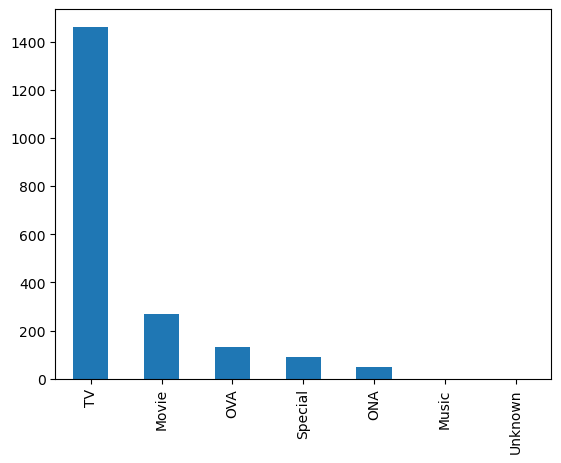

In [39]:
anime['Type'].value_counts().plot(kind='bar')

**Посмотрим на взаимосвязь жанров и выбора формата аниме, а так же какие аниме по жанрам и формату предпочтительнее зрителем (ведь входят в топ)**

In [40]:
anime.groupby('Type')['Demographics'].value_counts().unstack()

Demographics,Josei,Kids,Seinen,Shoujo,Shounen
Type,,,,,
Movie,NaN,14.0,14.0,6.0,73.0
ONA,NaN,NaN,3.0,2.0,4.0
OVA,NaN,NaN,13.0,7.0,50.0
Special,NaN,1.0,7.0,3.0,28.0
TV,27.0,10.0,181.0,86.0,354.0
Unknown,NaN,NaN,NaN,NaN,1.0


<AxesSubplot:xlabel='Type'>

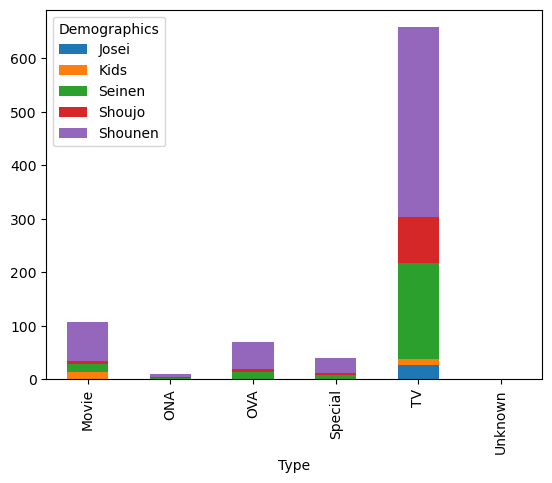

In [41]:
anime.groupby('Type')['Demographics'].value_counts().unstack().plot(kind='bar',stacked=True)

Сенен как жанр - остается наиболее популярен по почти для каждой платформы, но лидирует в формате ТВ

In [42]:
anime.head()

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age,Adult,For man,For woman
0,Death Note,8.63,1,3150451,TV,37.0,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity),1,1,0
1,Shingeki no Kyojin,8.52,2,3136959,TV,25.0,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity),1,1,0
2,Fullmetal Alchemist: Brotherhood,9.16,3,2674846,TV,64.0,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity),1,1,0
3,Sword Art Online,7.21,4,2583874,TV,25.0,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older,0,0,0
4,One Punch Man,8.52,5,2577610,TV,12.0,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity),1,0,0


**Узнаем какое среднее значение рейтинга имеют аниме входящие в Топ-2000, а так же аниме с самым большим и маленьким рейтингом**

In [43]:
anime['Rating'].mean()

7.462566953006558

In [44]:
anime['Rating'].median()

7.47

In [45]:
anime['Rating'].mode()

0    7.33
Name: Rating, dtype: float64

<AxesSubplot:>

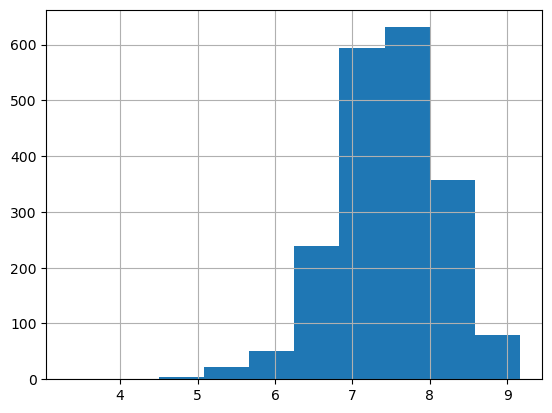

In [46]:
anime['Rating'].hist()

Заметим что значительное количество резюме в рейтинге 2000 находится между 7 и 8 баллами рейтинга, а так же много проектов с оценкой выше 9

In [47]:
anime.describe()

,Rating,Ranking,Followers,Episodes,Adult,For man,For woman
count,1979.000000,2000.000000,2.000000e+03,1975.000000,2000.000000,2000.000000,2000.000000
mean,7.462567,1000.500000,3.073250e+05,16.135190,0.318000,0.364000,0.065500
std,0.677055,577.494589,3.512699e+05,26.458671,0.465816,0.481269,0.247468
min,3.340000,1.000000,7.244300e+04,1.000000,0.000000,0.000000,0.000000
25%,7.090000,500.750000,1.097425e+05,7.000000,0.000000,0.000000,0.000000
50%,7.470000,1000.500000,1.764125e+05,12.000000,0.000000,0.000000,0.000000
75%,7.925000,1500.250000,3.375495e+05,13.000000,1.000000,1.000000,0.000000
max,9.160000,2000.000000,3.150451e+06,500.000000,1.000000,1.000000,1.000000


In [48]:
anime[anime['Rating'] == 9.16 ]

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age,Adult,For man,For woman
2,Fullmetal Alchemist: Brotherhood,9.16,3,2674846,TV,64.0,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity),1,1,0


In [49]:
anime[anime['Rating'] == 3.34 ]

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age,Adult,For man,For woman
1059,Pupa,3.34,1060,166001,TV,12.0,None found,Studio Deen,"Fantasy,Horror",NaN,R - 17+ (violence & profanity),1,0,0


**Наиболее высоким рейтингом таким образом обладает аниме "Стальной алхимик", а самым низким "Куколка"**

**Изучим какие жанры наиболее популярны для разных аудитории**

In [50]:
anime.groupby('Demographics')['Genre'].agg(lambda x: x.value_counts().index[0])

Demographics
Josei           Drama,Slice of Life,Sports
Kids       Action,Adventure,Comedy,Fantasy
Seinen                Comedy,Slice of Life
Shoujo                      Comedy,Romance
Shounen                     Comedy,Romance
Name: Genre, dtype: object

Интересно что жанры для мальчиков от 12 до 18 лет(сенен) и для девочек того же возраста (седзе) совпадают - комедия и романтика

In [51]:
anime.pivot_table(index='Adult', 
                  values=['Rating'],
                  aggfunc=['mean', 'median'])

,mean,median
,Rating,Rating
Adult,,
0,7.482554,7.48
1,7.419570,7.43


Можно так же посчитать, что по медианному и среднему значению показателей рейтинга, аудитория старше 18 менее требовательная чем не соверщеннолетняя

# Регрессионный анализ

In [52]:
anime.head()


,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age,Adult,For man,For woman
0,Death Note,8.63,1,3150451,TV,37.0,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity),1,1,0
1,Shingeki no Kyojin,8.52,2,3136959,TV,25.0,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity),1,1,0
2,Fullmetal Alchemist: Brotherhood,9.16,3,2674846,TV,64.0,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity),1,1,0
3,Sword Art Online,7.21,4,2583874,TV,25.0,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older,0,0,0
4,One Punch Man,8.52,5,2577610,TV,12.0,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity),1,0,0


# Для удобства последующей работы выкинем их Дата сета значения с пустым рейтингом

In [105]:
anime['Followers'] = anime['Followers'].str.replace(',','').astype(int)

AttributeError: Can only use .str accessor with string values!

In [55]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name of the anime  2000 non-null   object 
 1   Rating             1979 non-null   float64
 2   Ranking            2000 non-null   int32  
 3   Followers          2000 non-null   int32  
 4   Type               2000 non-null   object 
 5   Episodes           1975 non-null   float64
 6   License            2000 non-null   object 
 7   Study              2000 non-null   object 
 8   Genre              1832 non-null   object 
 9   Demographics       884 non-null    object 
 10  Age                2000 non-null   object 
 11  Adult              2000 non-null   int64  
 12  For man            2000 non-null   int64  
 13  For woman          2000 non-null   int64  
dtypes: float64(2), int32(2), int64(3), object(7)
memory usage: 203.2+ KB


In [56]:
anime['Rating'].describe()

count    1979.000000
mean        7.462567
std         0.677055
min         3.340000
25%         7.090000
50%         7.470000
75%         7.925000
max         9.160000
Name: Rating, dtype: float64

In [57]:
anime.isna().sum()

Name of the anime       0
Rating                 21
Ranking                 0
Followers               0
Type                    0
Episodes               25
License                 0
Study                   0
Genre                 168
Demographics         1116
Age                     0
Adult                   0
For man                 0
For woman               0
dtype: int64

In [70]:
anime[anime['Rating'].isna()]['Rating']

468    NaN
481    NaN
624    NaN
678    NaN
722    NaN
867    NaN
1016   NaN
1033   NaN
1132   NaN
1150   NaN
1328   NaN
1382   NaN
1494   NaN
1625   NaN
1744   NaN
1776   NaN
1880   NaN
1893   NaN
1925   NaN
1963   NaN
1991   NaN
Name: Rating, dtype: float64

In [58]:
anime.dropna(subset=['Rating'], inplace=True).shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [59]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name of the anime  1979 non-null   object 
 1   Rating             1979 non-null   float64
 2   Ranking            1979 non-null   int32  
 3   Followers          1979 non-null   int32  
 4   Type               1979 non-null   object 
 5   Episodes           1972 non-null   float64
 6   License            1979 non-null   object 
 7   Study              1979 non-null   object 
 8   Genre              1812 non-null   object 
 9   Demographics       874 non-null    object 
 10  Age                1979 non-null   object 
 11  Adult              1979 non-null   int64  
 12  For man            1979 non-null   int64  
 13  For woman          1979 non-null   int64  
dtypes: float64(2), int32(2), int64(3), object(7)
memory usage: 216.5+ KB


**Изучим корреляцию данных**

In [79]:
anime.corr()

,Rating,Ranking,Followers,Episodes,Adult,For man,For woman
Rating,1.000000,-0.343978,0.346825,0.104190,-0.043309,0.128987,0.060244
Ranking,-0.343978,1.000000,-0.727858,-0.133473,-0.105842,-0.038636,0.035338
Followers,0.346825,-0.727858,1.000000,0.205461,0.091115,0.089635,-0.051468
Episodes,0.104190,-0.133473,0.205461,1.000000,-0.082312,0.143857,0.027874
Adult,-0.043309,-0.105842,0.091115,-0.082312,1.000000,0.011641,-0.124758
For man,0.128987,-0.038636,0.089635,0.143857,0.011641,1.000000,-0.200904
For woman,0.060244,0.035338,-0.051468,0.027874,-0.124758,-0.200904,1.000000


In [80]:
anime['Episodes'] = pd.to_numeric(anime['Episodes'], errors='coerce')

In [81]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name of the anime  1979 non-null   object 
 1   Rating             1979 non-null   float64
 2   Ranking            1979 non-null   int32  
 3   Followers          1979 non-null   int32  
 4   Type               1979 non-null   object 
 5   Episodes           1972 non-null   float64
 6   License            1979 non-null   object 
 7   Study              1979 non-null   object 
 8   Genre              1812 non-null   object 
 9   Demographics       874 non-null    object 
 10  Age                1979 non-null   object 
 11  Adult              1979 non-null   int64  
 12  For man            1979 non-null   int64  
 13  For woman          1979 non-null   int64  
dtypes: float64(2), int32(2), int64(3), object(7)
memory usage: 216.5+ KB


In [92]:
animecor = anime[['Rating','Followers', 'Episodes', 'Adult', 'For man', 'For woman']]

In [93]:
animecor.head()

,Rating,Followers,Episodes,Adult,For man,For woman
0,8.63,3150451,37.0,1,1,0
1,8.52,3136959,25.0,1,1,0
2,9.16,2674846,64.0,1,1,0
3,7.21,2583874,25.0,0,0,0
4,8.52,2577610,12.0,1,0,0


In [94]:
Anime2 = animecor.corr()
print(Anime2)

             Rating  Followers  Episodes     Adult   For man  For woman
Rating     1.000000   0.346825  0.104190 -0.043309  0.128987   0.060244
Followers  0.346825   1.000000  0.205461  0.091115  0.089635  -0.051468
Episodes   0.104190   0.205461  1.000000 -0.082312  0.143857   0.027874
Adult     -0.043309   0.091115 -0.082312  1.000000  0.011641  -0.124758
For man    0.128987   0.089635  0.143857  0.011641  1.000000  -0.200904
For woman  0.060244  -0.051468  0.027874 -0.124758 -0.200904   1.000000


<AxesSubplot:xlabel='Rating', ylabel='Episodes'>

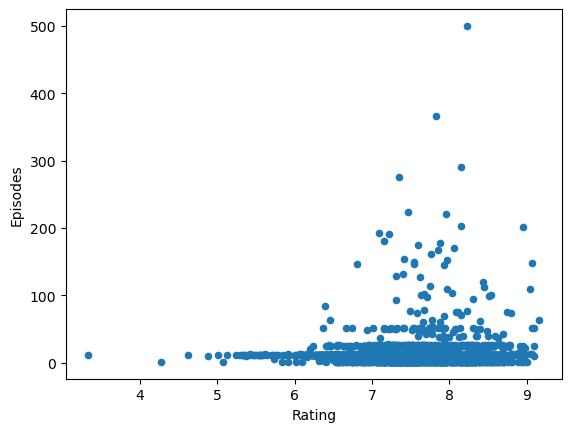

In [95]:
animecor.plot('Rating','Episodes', kind='scatter')


<AxesSubplot:xlabel='Rating', ylabel='Followers'>

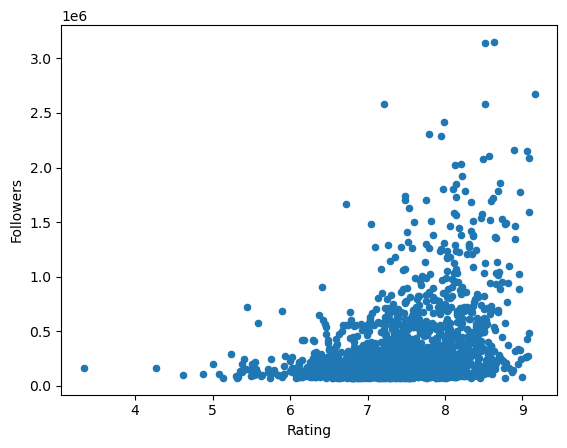

In [96]:
animecor.plot('Rating','Followers', kind='scatter')

<AxesSubplot:>

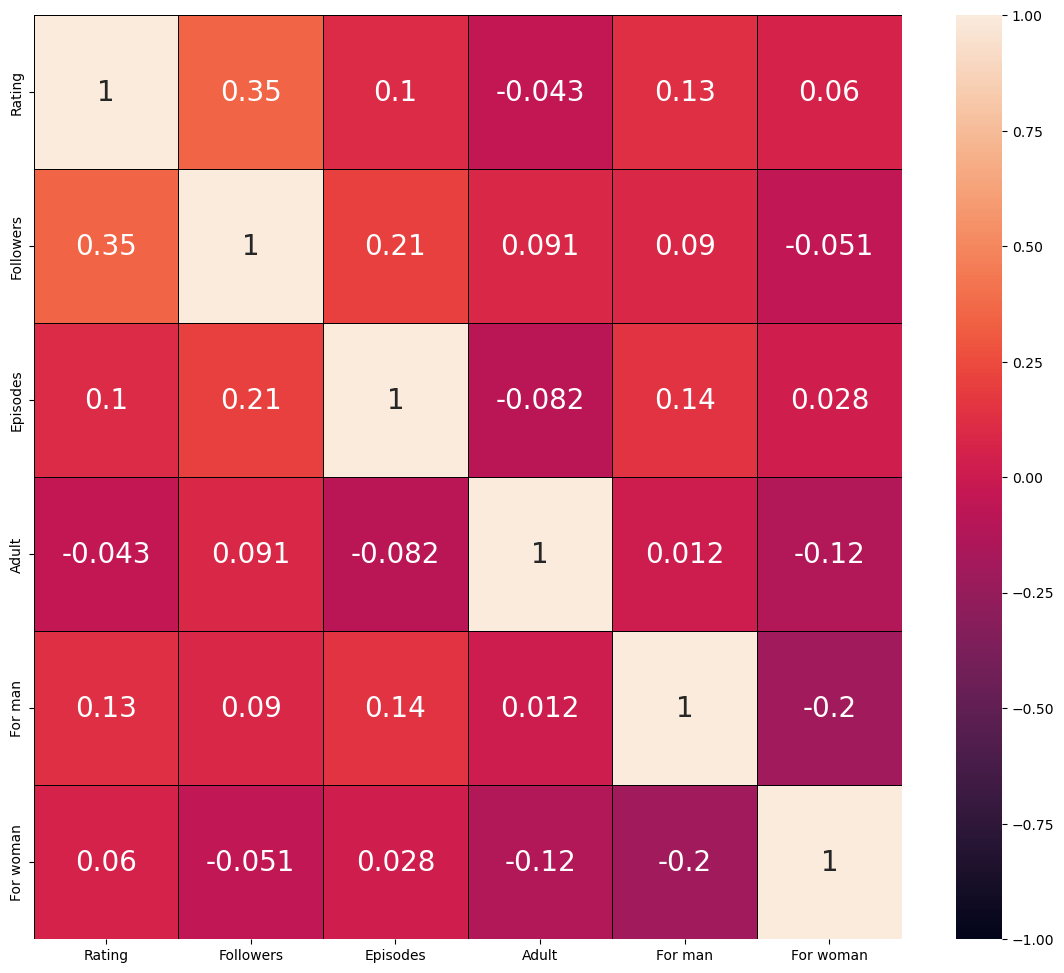

In [100]:
fig, ax = plt.subplots(figsize = (14,12))

sns.heatmap(Anime2, annot=True, linecolor='black', linewidth=0.5,
           annot_kws = {'size':20}, vmax = 1, vmin = -1)

**Получается что нет зависимости между количеством эпизодов и рейтингом аниме-продукта. Нельзя говорить о сильной корреляции, но определенная небольшая динамика зависимости между числом подписчиков и рейтингом аниме - есть**

Посмотрим есть ли зависимость между рейтингом и его распределением у аниме для взрослых и до 18 лет

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
anime.head()

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age,Adult,For man,For woman
0,Death Note,8.63,1,3150451,TV,37.0,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity),1,1,0
1,Shingeki no Kyojin,8.52,2,3136959,TV,25.0,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity),1,1,0
2,Fullmetal Alchemist: Brotherhood,9.16,3,2674846,TV,64.0,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity),1,1,0
3,Sword Art Online,7.21,4,2583874,TV,25.0,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older,0,0,0
4,One Punch Man,8.52,5,2577610,TV,12.0,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity),1,0,0


In [74]:
anime['Adult'].value_counts()

0    1351
1     628
Name: Adult, dtype: int64

<AxesSubplot:ylabel='Adult'>

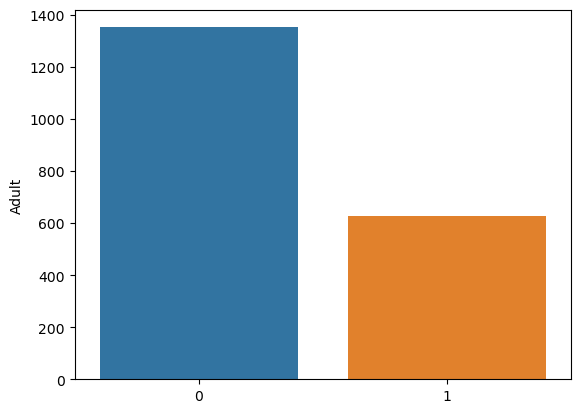

In [75]:
sns.barplot(x=anime['Adult'].value_counts().index, y=anime['Adult'].value_counts())

<AxesSubplot:xlabel='Adult', ylabel='Rating'>

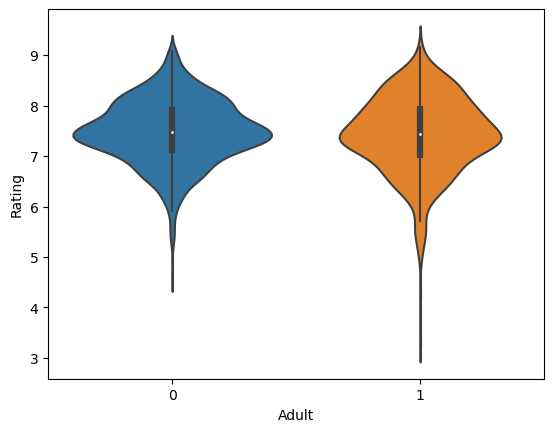

In [76]:
sns.violinplot(x=anime['Adult'], y=anime['Rating'])

В целом пиковые показатели рейтинга совпадают, но аниме для взрослых готовы ставить более низкие и высокие оценки, а так же делают это плавнее, ось второго изображения длиньше, они более требовательны.

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy as np

anime.head()

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age,Adult,For man,For woman
0,Death Note,8.63,1,3150451,TV,37.0,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity),1,1,0
1,Shingeki no Kyojin,8.52,2,3136959,TV,25.0,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity),1,1,0
2,Fullmetal Alchemist: Brotherhood,9.16,3,2674846,TV,64.0,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity),1,1,0
3,Sword Art Online,7.21,4,2583874,TV,25.0,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older,0,0,0
4,One Punch Man,8.52,5,2577610,TV,12.0,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity),1,0,0


Посмотрим есть ли линейная регрессия среди значений рейтинга, подписчиков и числа эпизодов

In [123]:
animecor = anime[['Rating','Followers', 'Episodes']]

In [124]:
animecor.head()

,Rating,Followers,Episodes
0,8.63,3150451,37.0
1,8.52,3136959,25.0
2,9.16,2674846,64.0
3,7.21,2583874,25.0
4,8.52,2577610,12.0


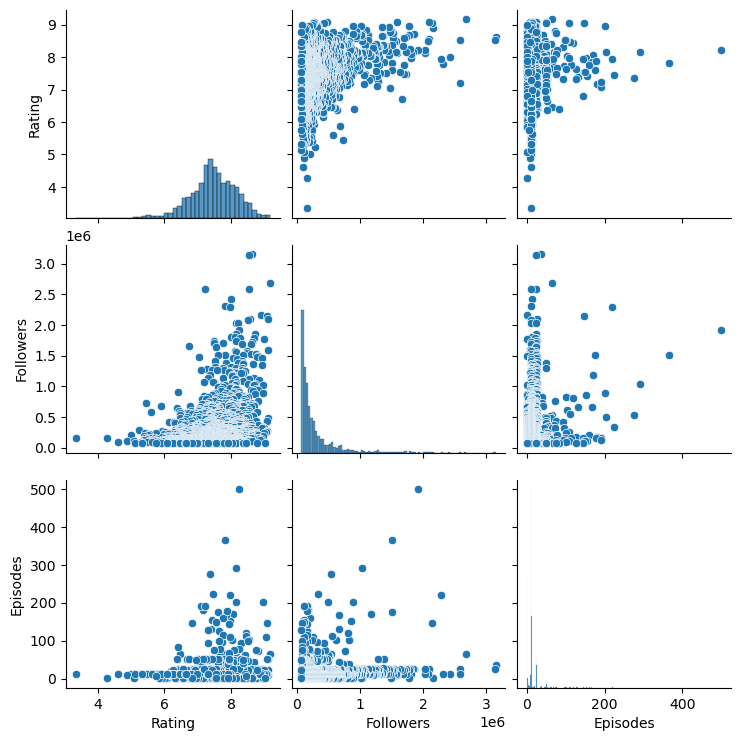

In [125]:
sns.pairplot(animecor)

# В случае моих данных линейной регрессии не наблюдается, но мы проведем несколько операций, поскольку это часть задания

In [126]:
x = animecor['Rating']
y = animecor['Followers']

res = scipy.stats.linregress(x, y)
print(res)

LinregressResult(slope=180672.91790296757, intercept=-1039436.548871422, rvalue=0.3468249272418292, pvalue=4.9318585040958744e-57, stderr=10988.787980316307, intercept_stderr=82341.20917391464)


In [127]:
r_sq = res.rvalue **2
print(r_sq)

0.1202875301563001


AttributeError: 'LinregressResult' object has no attribute 'intercert'

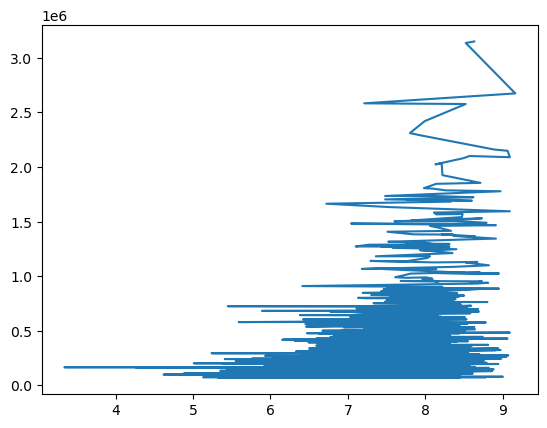

In [129]:
plt.plot(x, y)
plt.plot(x, res.intercert + res.slope * X)
plt.legend()
plt.show()

In [144]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [145]:
animecor = anime[['Rating','Followers', 'Episodes']]


In [146]:
X = sm.add_constant(anime['Adult'])
Y = anime['For man']

logit = sm.Logit(Y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.654950
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                For man   No. Observations:                 1979
Model:                          Logit   Df Residuals:                     1977
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:               0.0001033
Time:                        22:51:46   Log-Likelihood:                -1296.1
converged:                       True   LL-Null:                       -1296.3
Covariance Type:            nonrobust   LLR p-value:                    0.6049
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5797      0.057    -10.222      0.000      -0.691      -0.469
Adult          0.0519      0.

In [147]:
np.exp(-0.5797)

0.5600663612733179

In [148]:
np.exp(0.0519)

1.0532704102058166

In [151]:
anime.groupby('For man')['Adult'].value_counts().unstack()

Adult,0,1
For man,,
0,866,395
1,485,233


In [157]:
p_1_forman = 458 / (458 + 866)
p_0_forman = 1 - p_1_forman
odds_1_forman = p_1_forman / p_0_forman
print (odds_1_forman)
print (np.log(odds_1_forman))

0.5288683602771364
-0.63701572444825


In [ ]:
X = sm.add_constant(anime['Adult'])
Y = anime['For man']

logit = sm.Logit(Y, X)
results = logit.fit()
print(results.summary())

# Немного выводов:
- Фанаты аниме преподчитают многосерийные продукты, нежели полнометражные метры
- J.C.Staff - студия хитмейкер, на ее счету множество проектов входящих в топы у зрителей
- Наиболее распространенное количество серий в аниме - сериале - 12 (за сезон)
- Аниме для взрослых преимущественно рассчитано на мужскую аудиторию
- Самый популярный жанр у фанатов аниме - сенен
- Любимые жанры для мальчиков от 12 до 18 лет(сенен) и для девочек того же возраста (седзе) совпадают - комедия и романтика, они смотрят похожие тайтлы
- Взрослая аудитория более требовательна к проектам и готова ставить негативные оценки


